# Google Stock Price with RNN

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [75]:
train=pd.read_csv('GoogleStockPriceTrain.csv')

In [76]:
train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [77]:
train = train.iloc[:,1:2].values
sc = MinMaxScaler()
train = sc.fit_transform(train)

In [78]:
train.shape

(1258, 1)

In [79]:
X_train = train[0:1257]
y_train = train[1:1258]

Text(0.5,0,'Time')

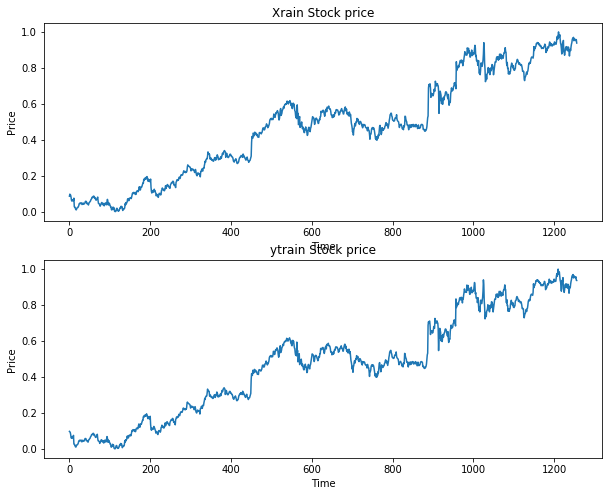

In [80]:
# plotting the metrics
fig = plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
plt.plot(X_train)
plt.title('Xrain Stock price')
plt.ylabel('Price')
plt.xlabel('Time')
plt.subplot(2,1,2)
plt.plot(y_train)
plt.title('ytrain Stock price')
plt.ylabel('Price')
plt.xlabel('Time')

# Reshape the data for time series

In [20]:
X_train = np.reshape(X_train,(1257,1,1)) # observation, time Steps, features

In [21]:
X_train.shape

(1257, 1, 1)

In [23]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [31]:
reg.fit?

In [26]:
reg = Sequential()
#Adding input layer
reg.add(LSTM(units = 4, activation='sigmoid', input_shape=(None,1)))

#Adding output layer
reg.add(Dense(units=1))

In [28]:
#Compile RNN
reg.compile(optimizer ='adam', loss='mean_squared_error')

In [32]:
#Fitting the model
reg.fit(X_train,y_train,batch_size=64,epochs=200,verbose=2)

Epoch 1/200
 - 0s - loss: 2.4969e-04
Epoch 2/200
 - 0s - loss: 2.4833e-04
Epoch 3/200
 - 0s - loss: 2.4719e-04
Epoch 4/200
 - 0s - loss: 2.4721e-04
Epoch 5/200
 - 0s - loss: 2.4764e-04
Epoch 6/200
 - 0s - loss: 2.4773e-04
Epoch 7/200
 - 0s - loss: 2.4678e-04
Epoch 8/200
 - 0s - loss: 2.4942e-04
Epoch 9/200
 - 0s - loss: 2.4774e-04
Epoch 10/200
 - 0s - loss: 2.4800e-04
Epoch 11/200
 - 0s - loss: 2.5073e-04
Epoch 12/200
 - 0s - loss: 2.4836e-04
Epoch 13/200
 - 0s - loss: 2.4973e-04
Epoch 14/200
 - 0s - loss: 2.4911e-04
Epoch 15/200
 - 0s - loss: 2.4799e-04
Epoch 16/200
 - 0s - loss: 2.5032e-04
Epoch 17/200
 - 0s - loss: 2.4942e-04
Epoch 18/200
 - 0s - loss: 2.4903e-04
Epoch 19/200
 - 0s - loss: 2.4701e-04
Epoch 20/200
 - 0s - loss: 2.4707e-04
Epoch 21/200
 - 0s - loss: 2.5066e-04
Epoch 22/200
 - 0s - loss: 2.4878e-04
Epoch 23/200
 - 0s - loss: 2.6284e-04
Epoch 24/200
 - 0s - loss: 2.4950e-04
Epoch 25/200
 - 0s - loss: 2.4845e-04
Epoch 26/200
 - 0s - loss: 2.4775e-04
Epoch 27/200
 - 0s - 

# Compare between Real and Predicted Stock Price

In [54]:
test = pd.read_csv('GoogleStockPriceTest.csv')
test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [55]:
test.shape

(20, 6)

In [56]:
real_test = test.iloc[:,1:2].values
test = sc.transform(real_test)
test = np.reshape(test,(20,1,1))
test.shape

(20, 1, 1)

In [57]:
# Predict the test data
prediction = reg.predict(test)

In [58]:
# Inverse the result 
prediction = sc.inverse_transform(prediction)

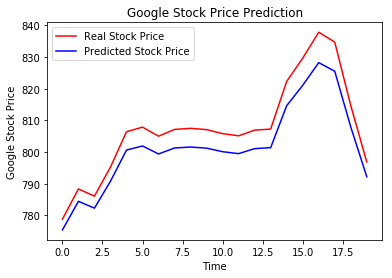

In [59]:
plt.plot(real_test,color='red',label='Real Stock Price')
plt.plot(prediction,color='blue',label='Predicted Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [69]:
import math
from sklearn.metrics import mean_squared_error

In [72]:
rmse = math.sqrt(mean_squared_error(real_test,prediction)) # Root mean squared error
print(rmse)
print(rmse/800) #average value

6.220392955196608
0.00777549119399576


# Evaluate with train data

In [62]:
real_stock_price_train = pd.read_csv('GoogleStockPriceTrain.csv')
real_stock_price_train = real_stock_price_train.iloc[:,1:2].values

In [63]:
predict_train = reg.predict(X_train)
predict_train = sc.inverse_transform(predict_train)

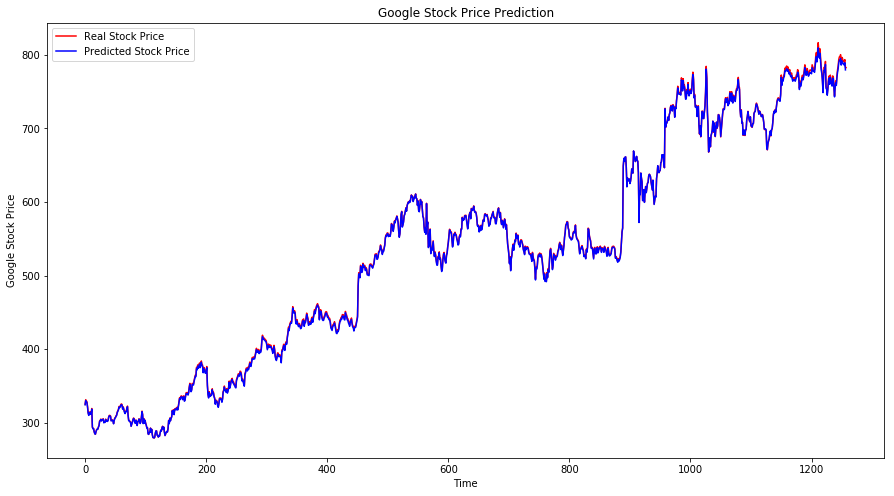

In [66]:
plt.figure(figsize=(15,8))
plt.plot(real_stock_price_train,color='red',label='Real Stock Price')
plt.plot(predict_train,color='blue',label='Predicted Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()